## Part 1: Evolving a random distribution to a Maxwell-Boltzmann distribution

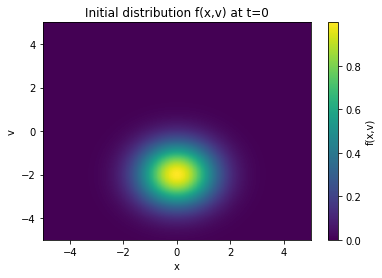

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Position and velocity grid
x = np.linspace(-5, 5, 200)
v = np.linspace(-5, 5, 200)
X, V = np.meshgrid(x, v)

# Initial condition
n0 = 1.0
sigma_x = 1.0
v0 = 2.0
sigma_v = 1.0

n_x = n0 * np.exp(-X**2 / (2 * sigma_x**2))
f_p = np.exp(-(V - v0)**2 / (2 * sigma_v**2))
f0 = n_x * f_p

plt.imshow(f0, extent=[x.min(), x.max(), v.min(), v.max()], aspect='auto')
plt.title("Initial distribution f(x,v) at t=0")
plt.xlabel("x")
plt.ylabel("v")
plt.colorbar(label='f(x,v)')
plt.show()

In [ ]:
# Simulate a set of particles moving in 1D inside a harmonic potential:
# U(x)=1/2*kx^2
# Start with random initial positions and velocities not at equilibrium, 
# and show that the system evolves toward the Maxwell-Boltzmann distribution.


# Equations of motion
# dx/dt = v
# dv/dt = -k/m*x

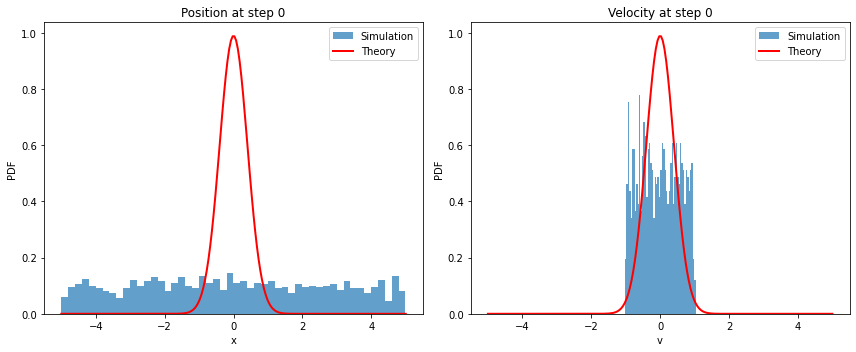

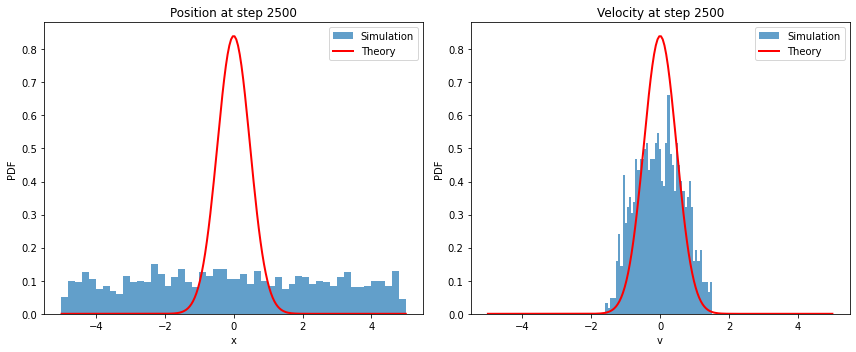

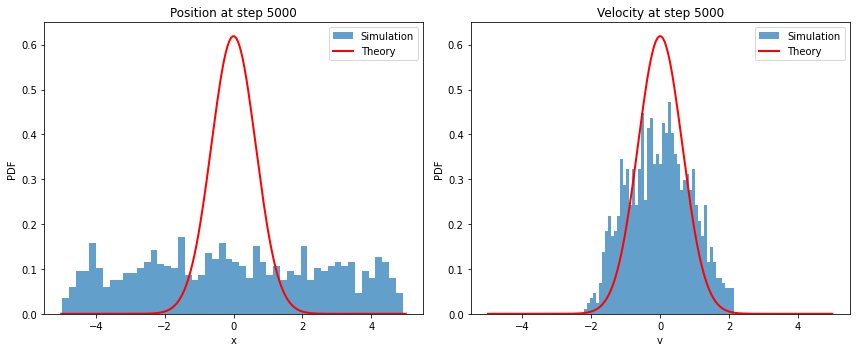

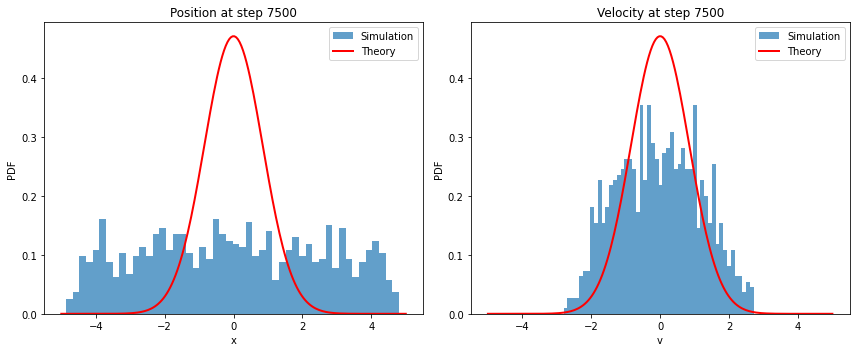

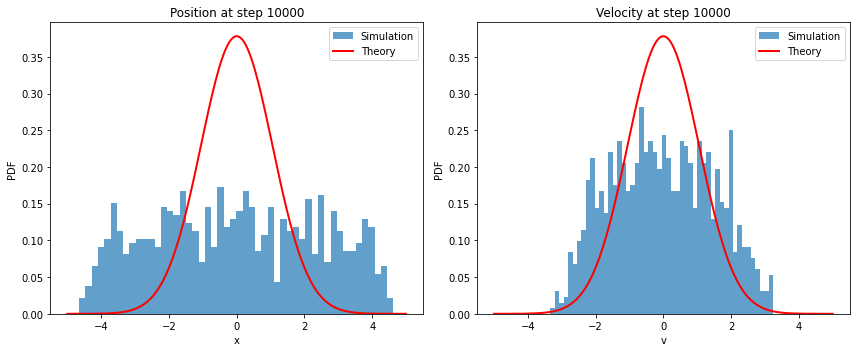

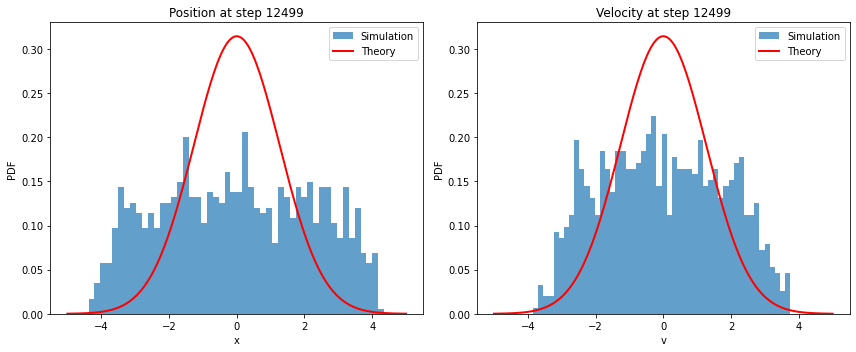

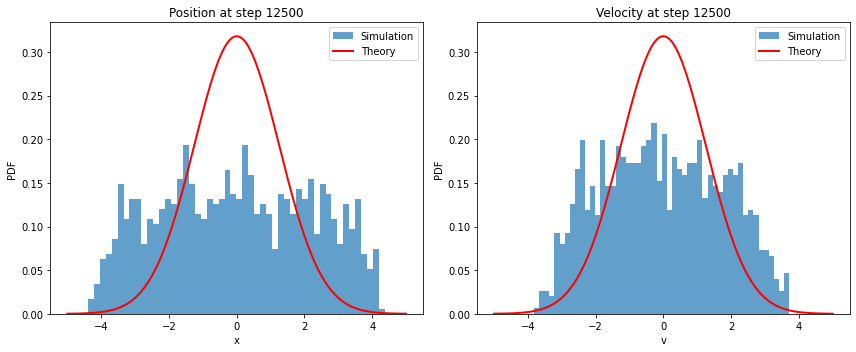

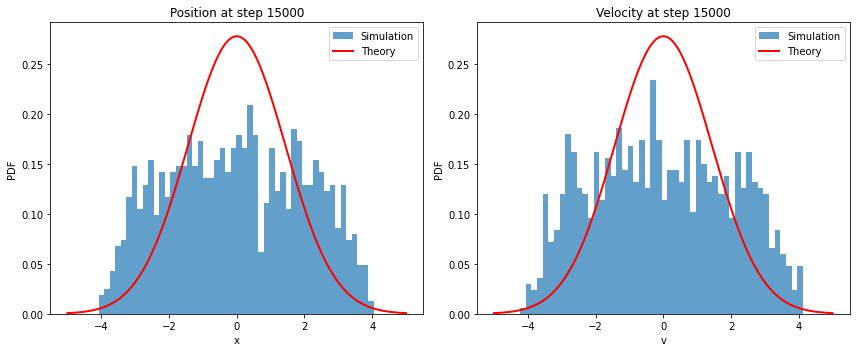

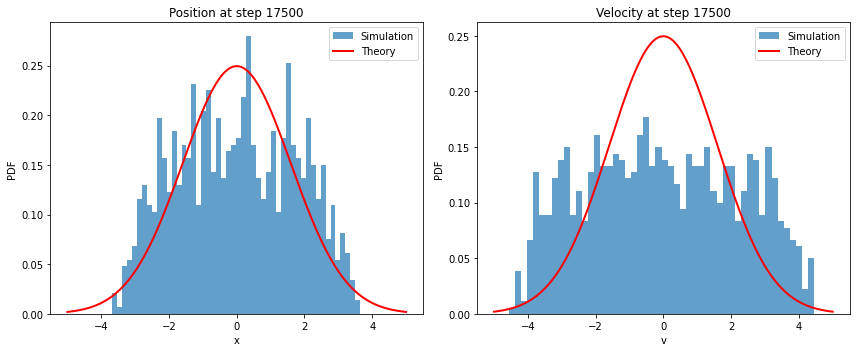

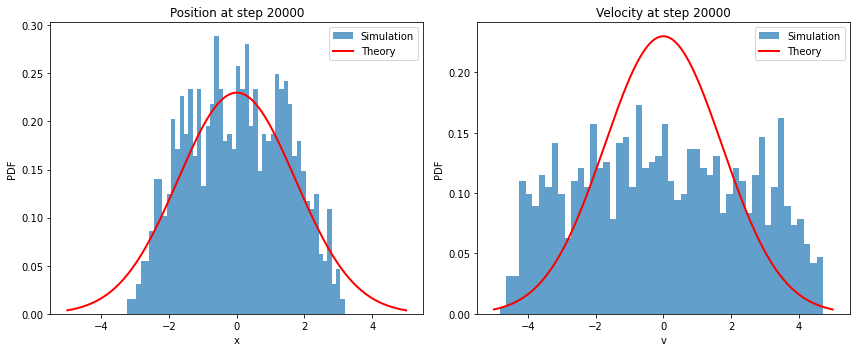

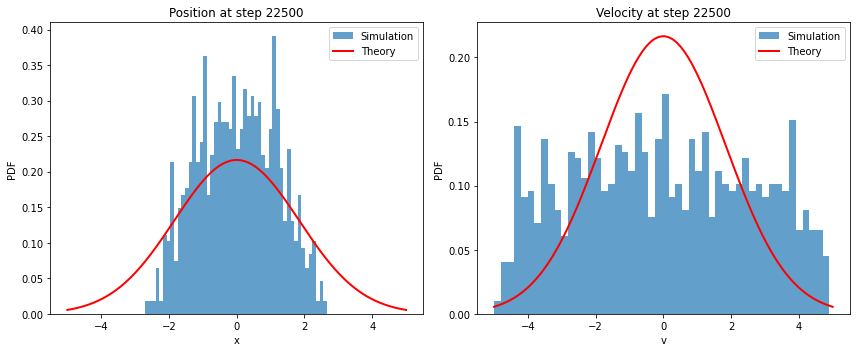

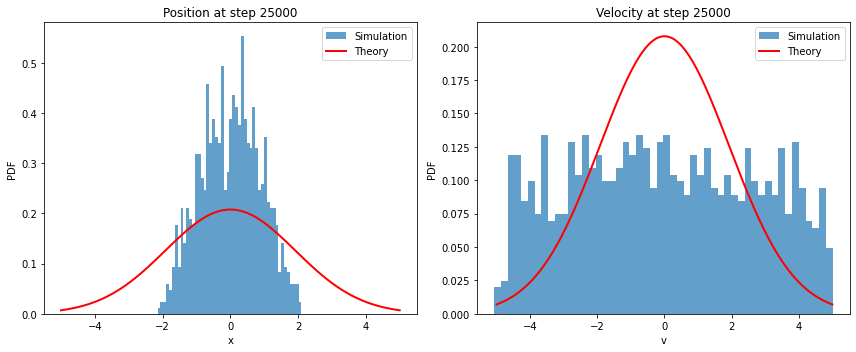

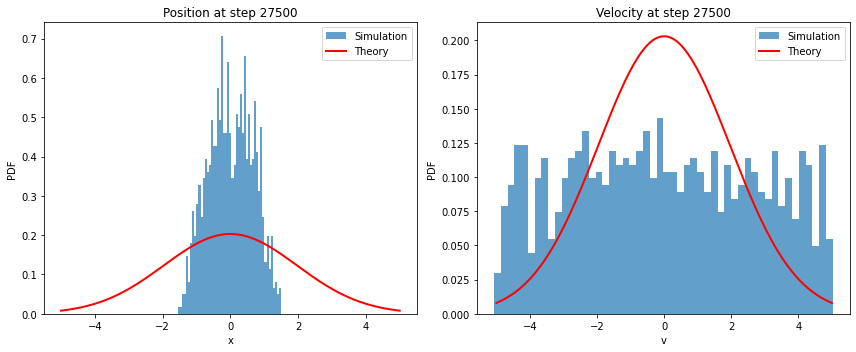

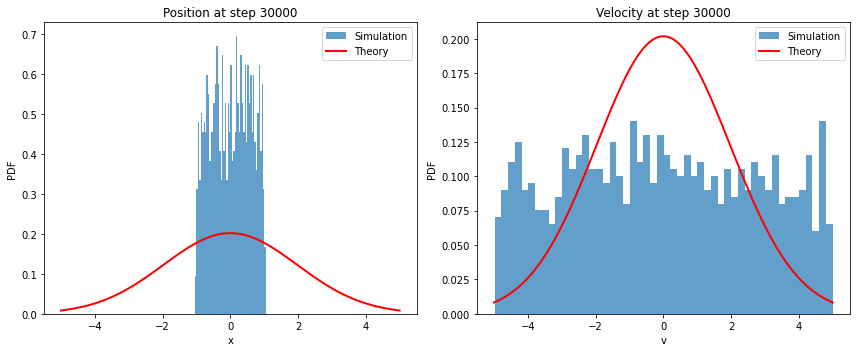

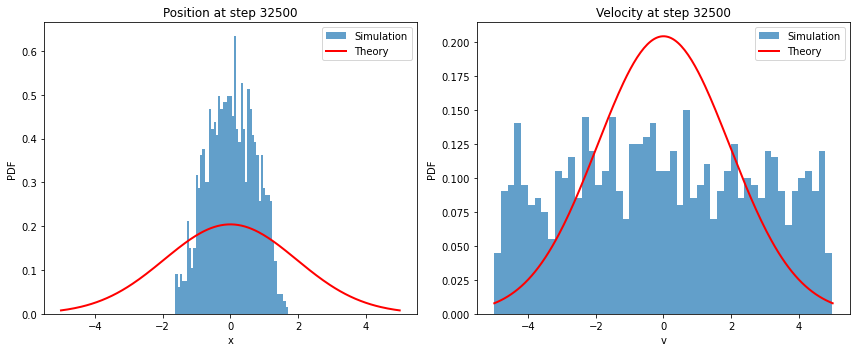

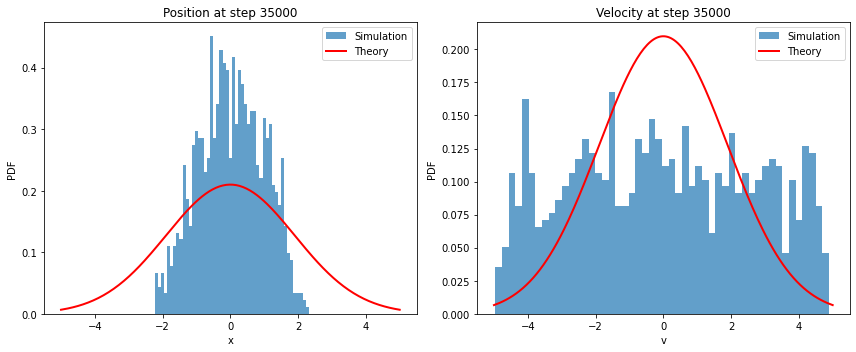

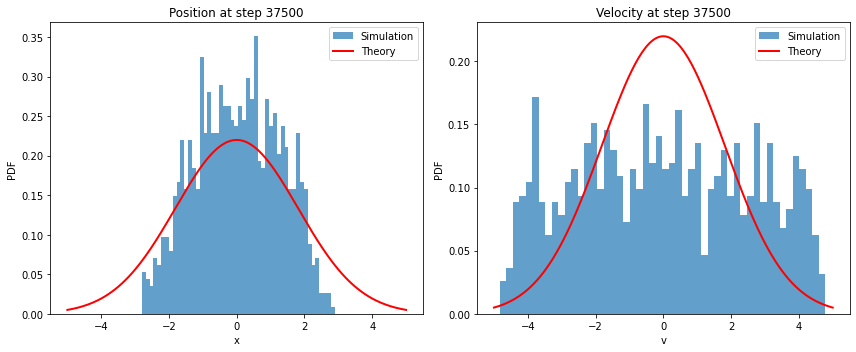

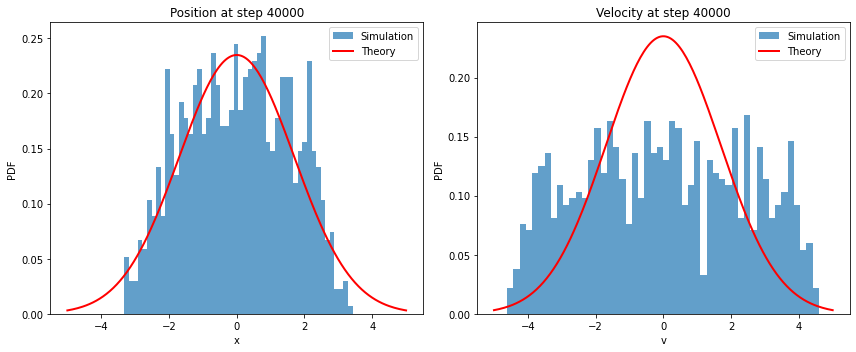

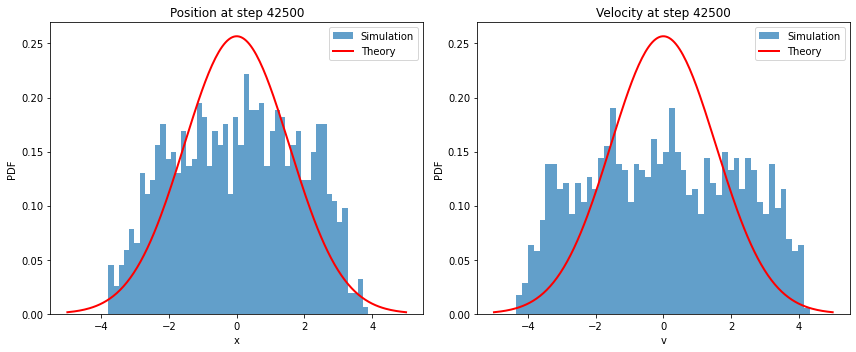

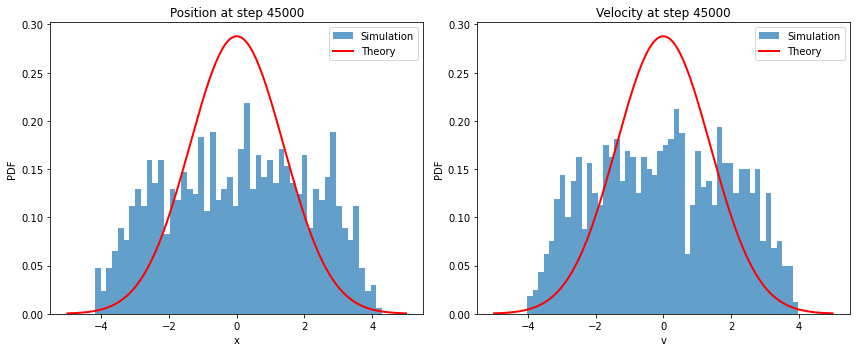

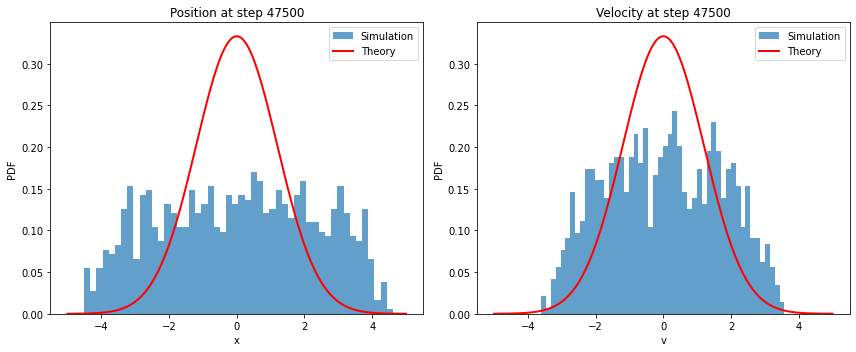

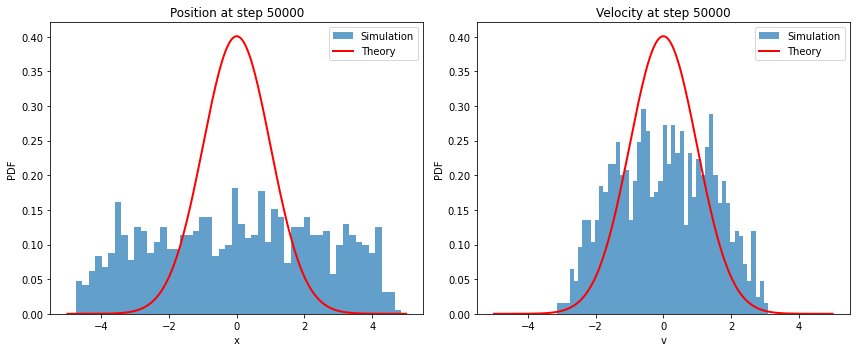

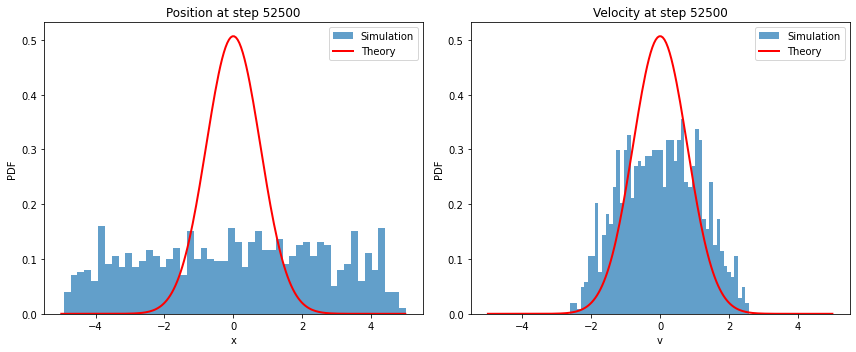

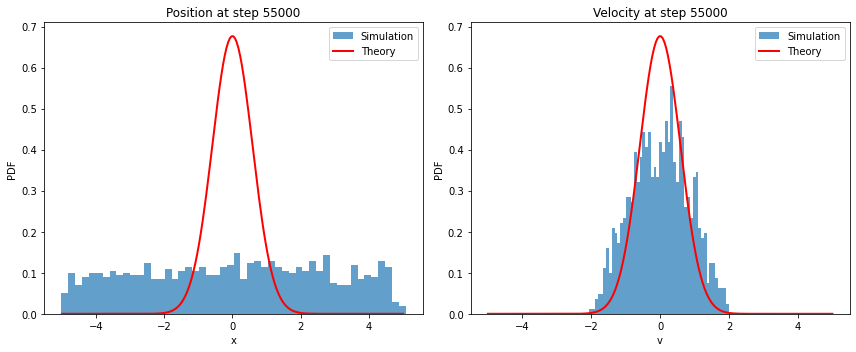

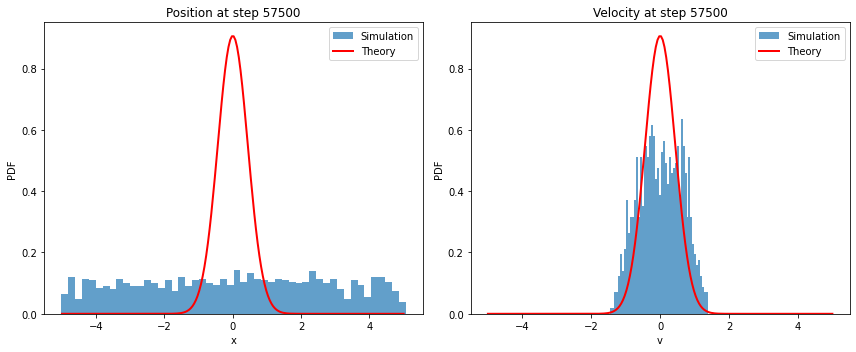

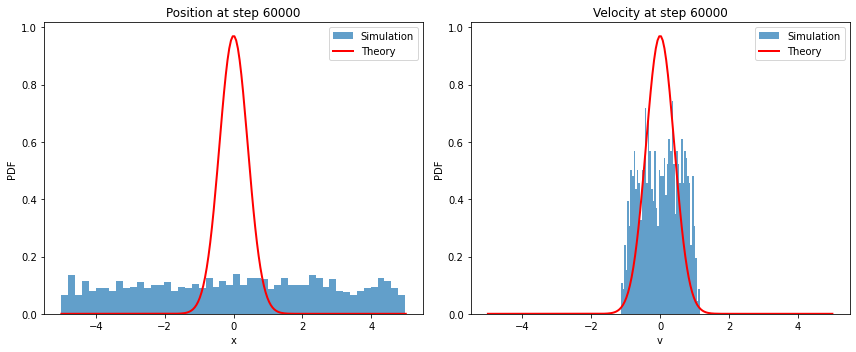

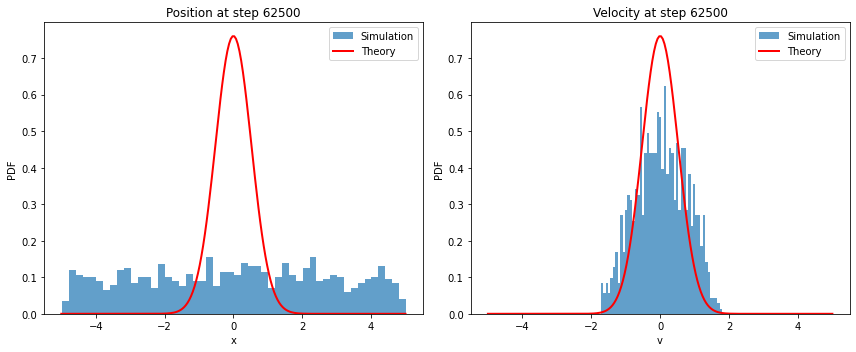

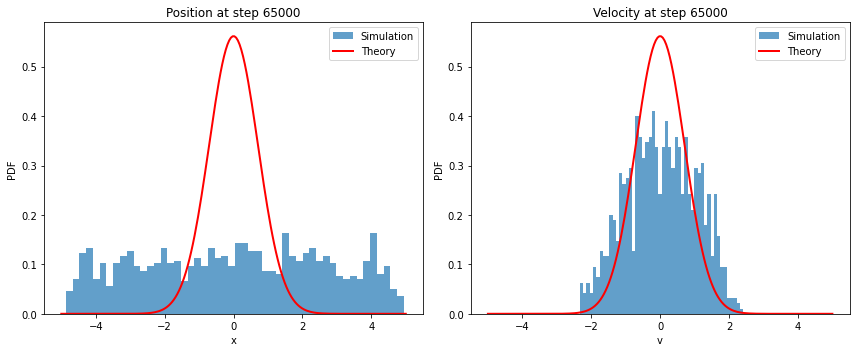

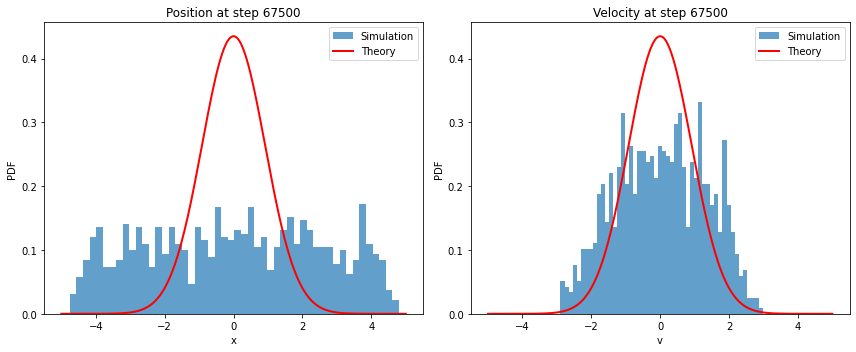

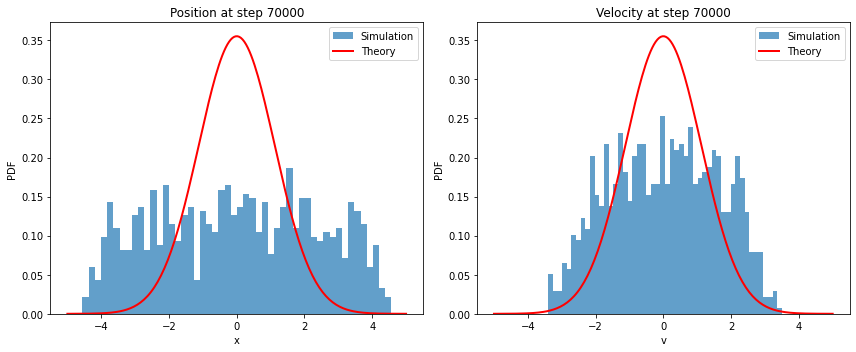

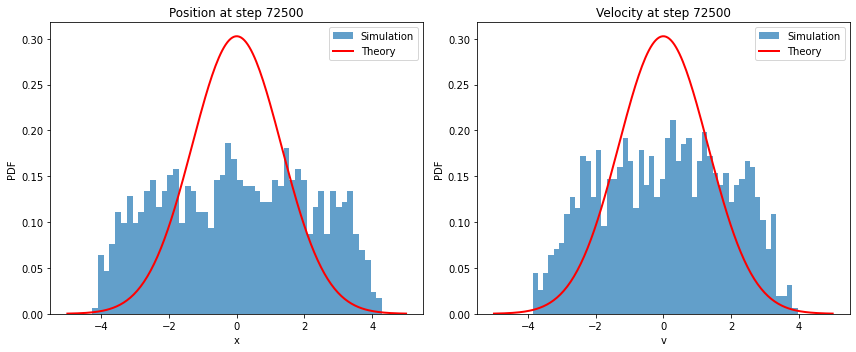

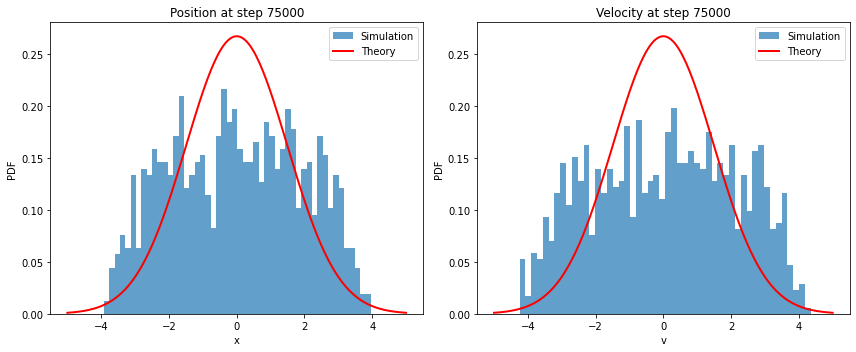

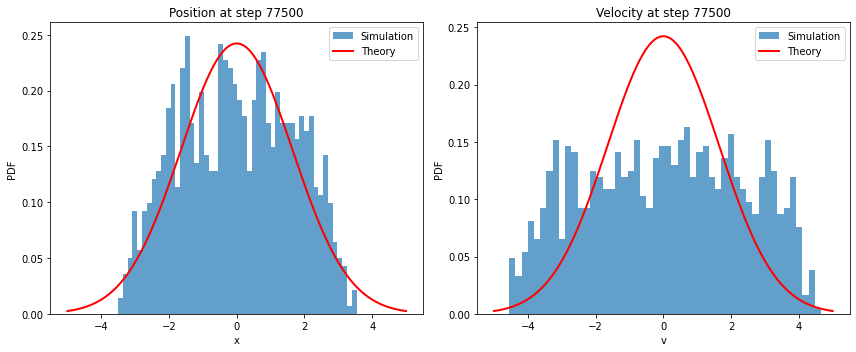

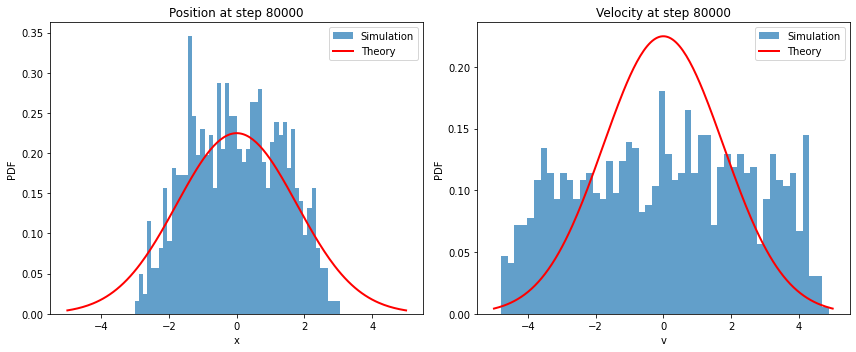

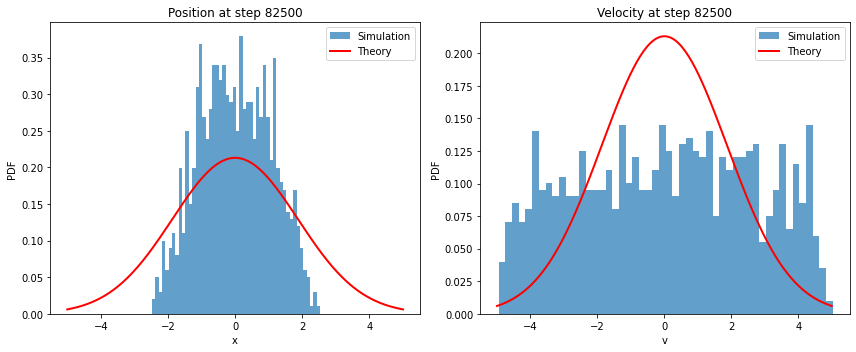

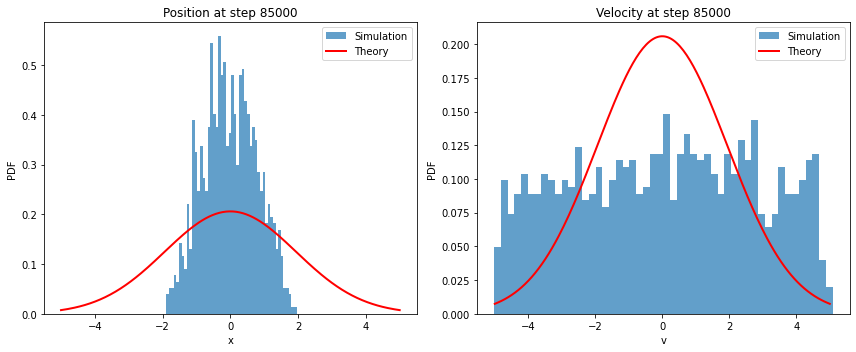

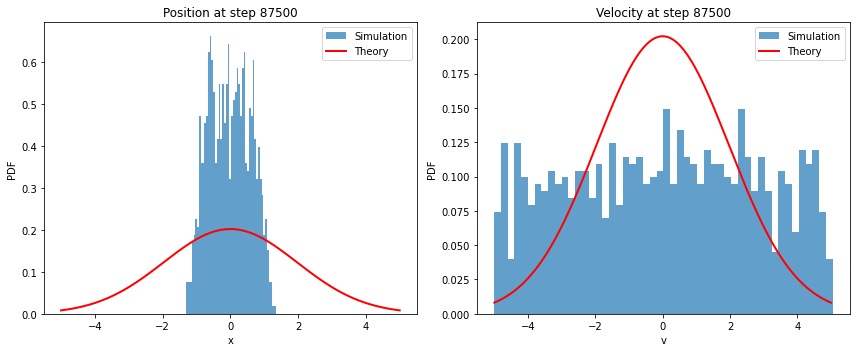

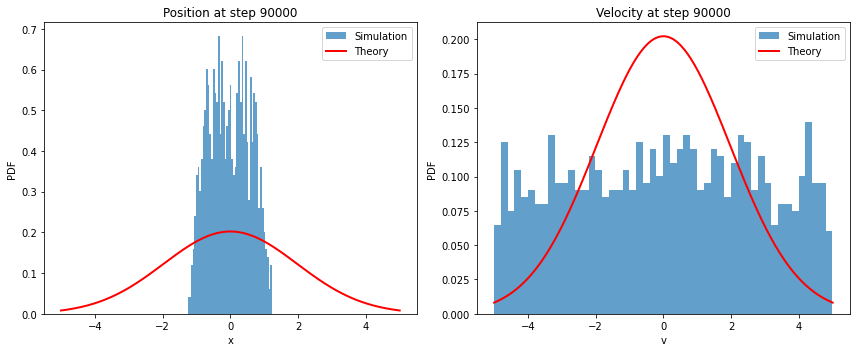

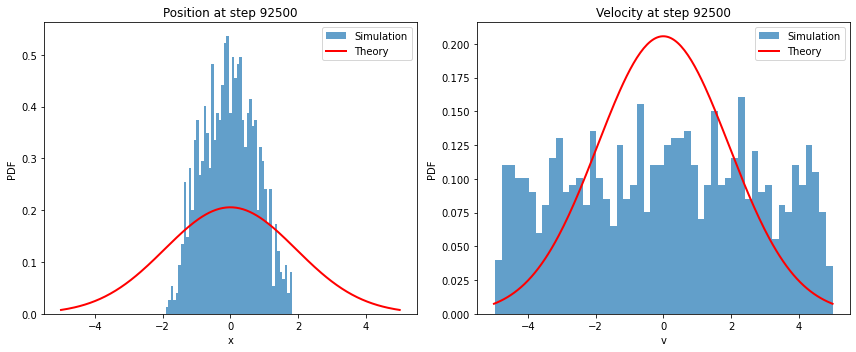

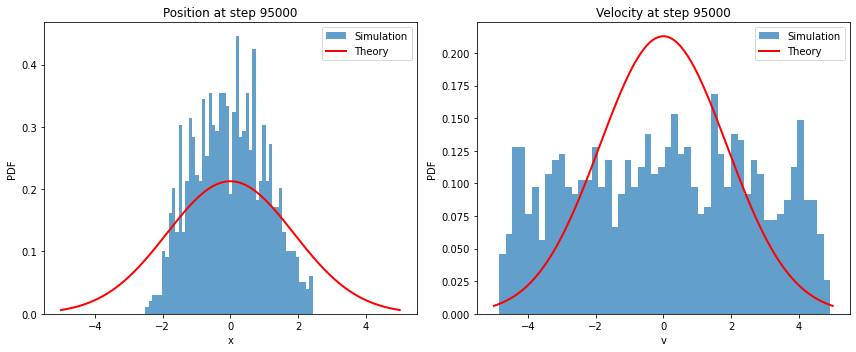

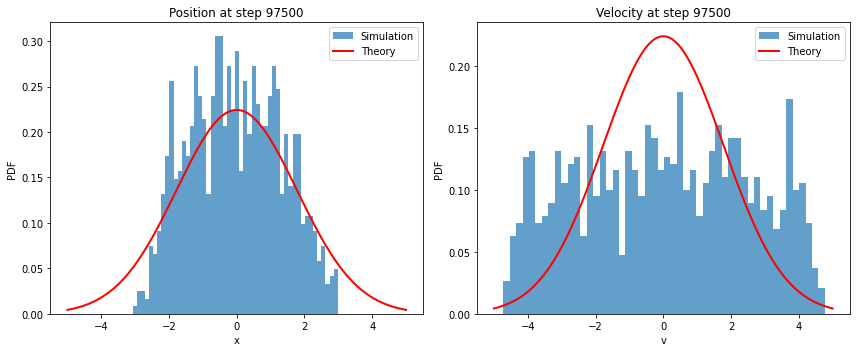

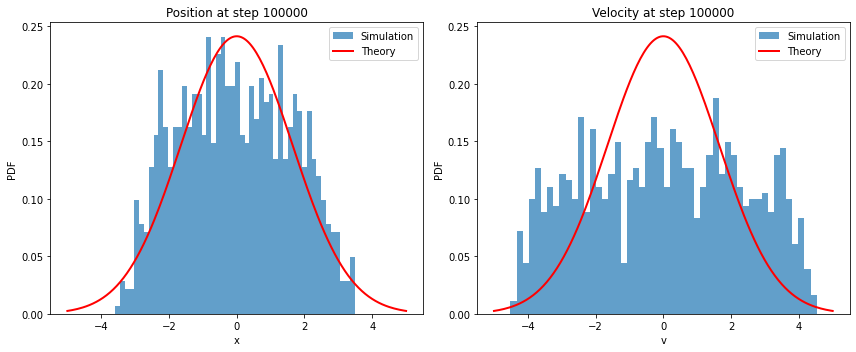

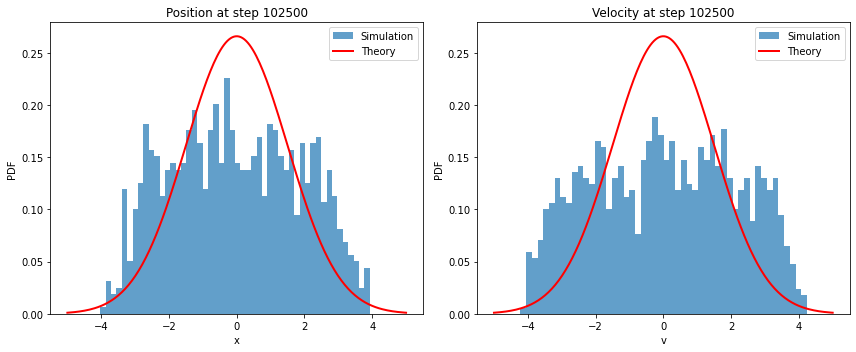

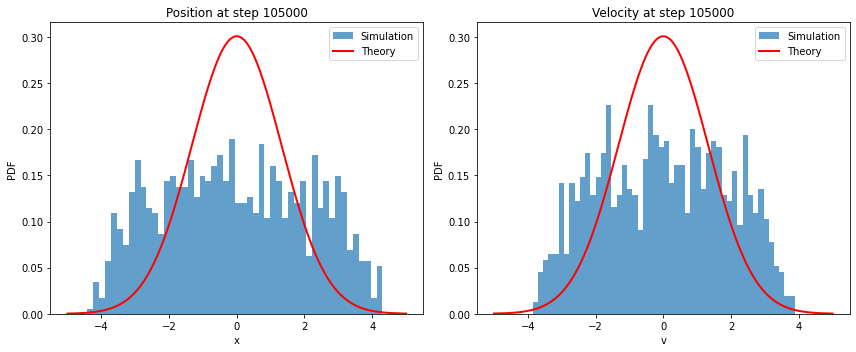

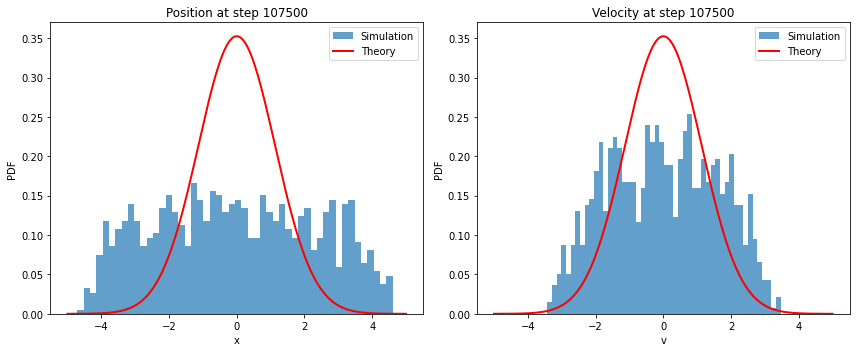

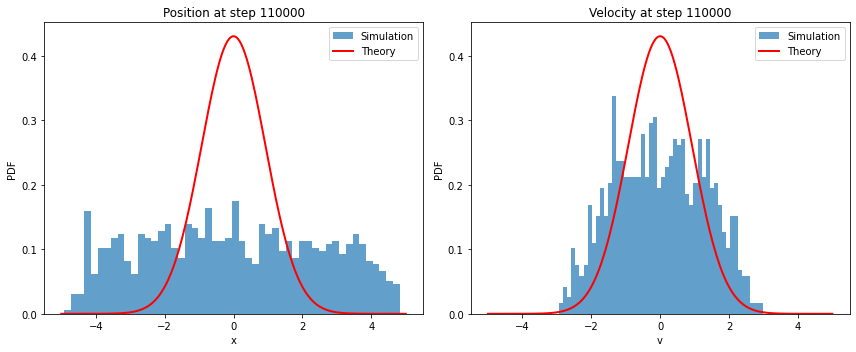

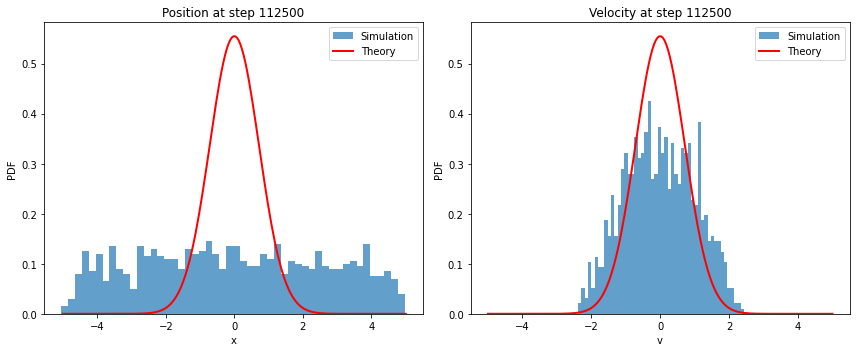

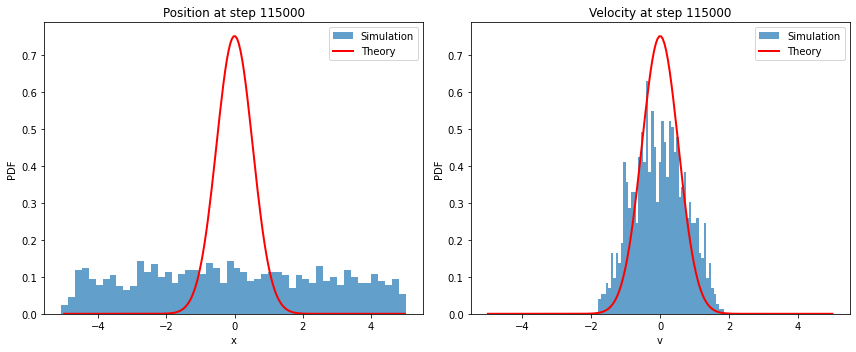

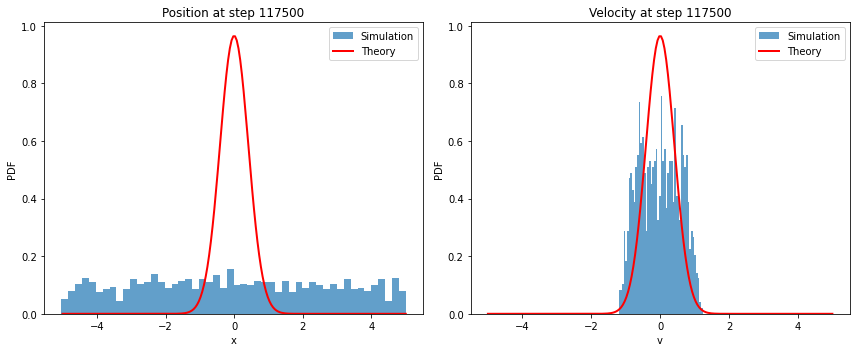

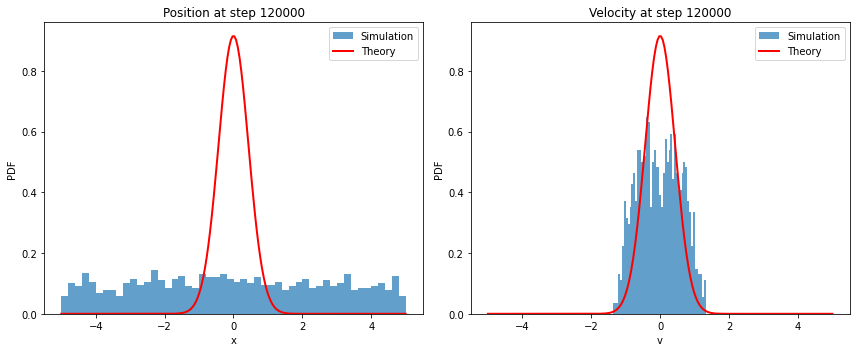

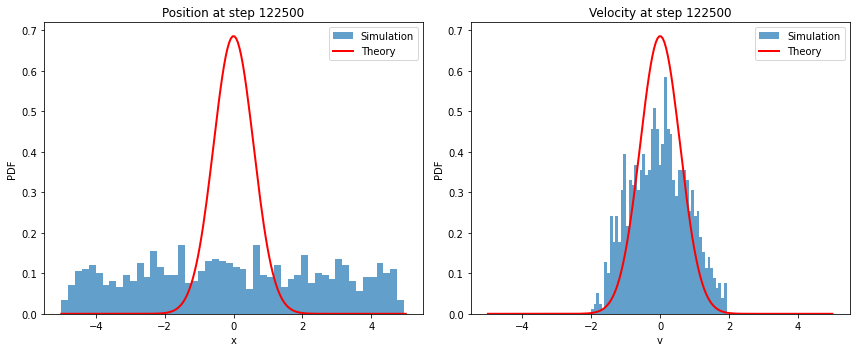

In [68]:
# Runge Kutta 4th order
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N_particles = 1000   # Number of particles
m = 1.0
k = 1.0

dt = 0.01
Num_steps = 125000  # 125 time units = 12500

# Initial conditions: random positions and velocities
x = np.random.uniform(-5, 5, N_particles)
v = np.random.uniform(-1, 1, N_particles)


# Array to save all positions and velocities
x_position = np.zeros((Num_steps+1, N_particles))
velocity = np.zeros((Num_steps+1, N_particles))
x_position[0,:] = x
velocity[0,:] = v

# RK4 integrator for harmonic oscillator
def rk4_step(x, v, dt, k, m):
    k1x = v
    k1v = -(k/m)*x

    k2x = v + 1/2 * dt * k1v
    k2v = -(k/m) * (x + 1/2 * dt * k1x)

    k3x = v + 1/2 * dt * k2v
    k3v = -(k/m) * (x + 1/2 * dt * k2x)

    k4x = v + dt * k3v
    k4v = -(k/m) * (x + dt * k3x)

    x_new = x + (dt/6)*(k1x + 2*k2x + 2*k3x + k4x)
    v_new = v + (dt/6)*(k1v + 2*k2v + 2*k3v + k4v)

    return x_new, v_new

# Time evolution
for step in range(Num_steps):
    x, v = rk4_step(x, v, dt, k, m)
    
    # Save all positions and velocities
    x_position[step+1,:] = x
    velocity[step+1,:] = v

    # Plot every 2500 steps (~5 oscillations)
    if step % 2500 == 0 or step == Timesteps - 1:
        plt.figure(figsize=(12,5))

        # Position histogram
        plt.subplot(1,2,1)
        plt.hist(x, bins=50, density=True, alpha=0.7, label='Simulation')

        # Theoretical position distribution
        KE = 1/2*m*np.mean(v**2)
        T = KE  # k_B = 1
        sigma_x = np.sqrt(T/k)
        x_vals = np.linspace(-5, 5, 200)
        P_x = 1/(np.sqrt(2*np.pi)*sigma_x)*np.exp(-x_vals**2/(2*sigma_x**2))
        plt.plot(x_vals, P_x, 'r-', lw=2, label='Theory')
        plt.title(f'Position at step {step}')
        plt.xlabel('x')
        plt.ylabel('PDF')
        plt.legend()

        # Velocity histogram
        plt.subplot(1,2,2)
        plt.hist(v, bins=50, density=True, alpha=0.7, label='Simulation')

        sigma_v = np.sqrt(T/m)
        v_vals = np.linspace(-5, 5, 200)
        P_v = 1/(np.sqrt(2*np.pi)*sigma_v)*np.exp(-v_vals**2/(2*sigma_v**2))
        plt.plot(v_vals, P_v, 'r-', lw=2, label='Theory')
        plt.title(f'Velocity at step {step}')
        plt.xlabel('v')
        plt.ylabel('PDF')
        plt.legend()

        plt.tight_layout()
        plt.show()

In [ ]:
# We see that the velocity distribution quickly resembles a Gaussian, but the positions do not.
# Then the positions become Gaussian while the velicities become random again. These two cycle back and forth.
# This is phase mixing, where the position and velocity oscillate with the same frequency but their phases are shifted.

## Part 2: The Langevin equation

In [ ]:
# Simulating thermalisation requires friction, random noise, or collisions.
# We will make it more realistic by solving the Langevin equation

# We will add a drag term, gamma, and a noise term, eta, to implement stochastic kicks.

# The Langevin equation is a stochastic differential equation (SDE), for which the Euler–Maruyama can be used.
# The RK4 method is used for smooth, deterministic right-hand sides, not for white noise.

Simulated 50000 steps.


C:\Users\Annet\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1870: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


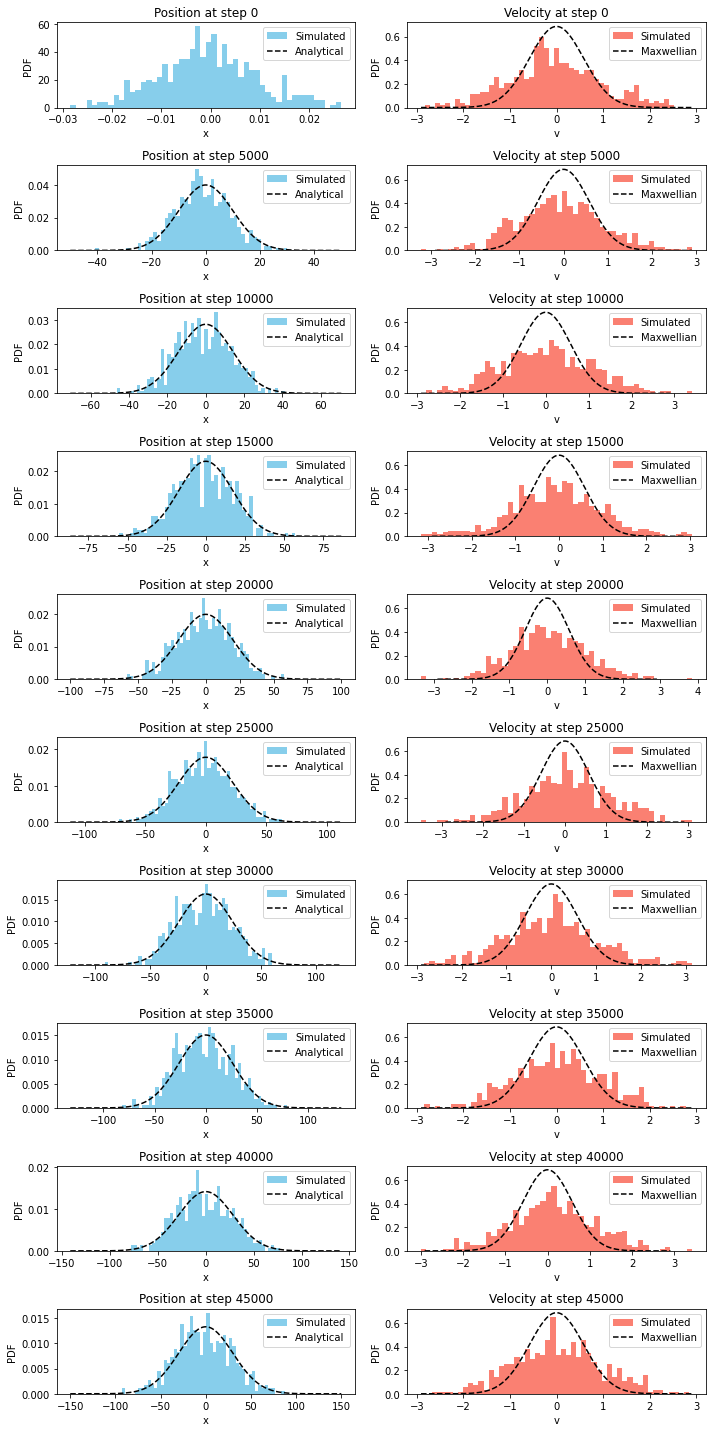

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# ------------------------
# Langevin parameters
# ------------------------

N = 500            # number of particles
T = 1.0            # temperature (k_B T)
m = 1.0            # mass
gamma = 1.0        # friction
D = gamma * T / m  # fluctuation-dissipation
D_x = T / gamma

dt = 0.01
Num_steps = 50000
save_every = 5000  # save every N steps

# ------------------------
# Initialize arrays
# ------------------------

x = np.zeros(N)
v = np.random.randn(N)  # initial Gaussian guess

x_histories = []
v_histories = []

# ------------------------
# Main loop
# ------------------------

for step in range(Num_steps):
    # Euler–Maruyama update
    x += v * dt
    v += -gamma * v * dt + np.sqrt(2 * D * dt) * np.random.randn(N)
    
    if step % save_every == 0:
        x_histories.append(x.copy())
        v_histories.append(v.copy())

print(f"Simulated {steps} steps.")

# ------------------------
# Plot position and velocity histograms + Maxwellian
# ------------------------

Num_snapshots = len(x_histories)

fig, axes = plt.subplots(Num_snapshots, 2, figsize=(10, 2*Num_snapshots))

# Maxwellian parameters
mu = 0
sigma = np.sqrt(T/m)

for i in range(Num_snapshots):
    # Position histogram
    x_vals = x_histories[i]
    axes[i, 0].hist(x_vals, bins=50, density=True, color='skyblue', label='Simulated')
    
    # Analytical spreading Gaussian for x
    time = i * save_every * dt
    sigma_x = np.sqrt(2 * D_x * time)
    x_range = np.linspace(-5*sigma_x, 5*sigma_x, 200)
    pos_pdf = norm.pdf(x_range, loc=0, scale=sigma_x)
    axes[i, 0].plot(x_range, pos_pdf, 'k--', label='Analytical')
    axes[i, 0].set_title(f"Position at step {i*save_every}")
    axes[i, 0].set_xlabel('x')
    axes[i, 0].set_ylabel('PDF')
    axes[i, 0].legend()
    
    # Velocity histogram with Maxwellian
    v_vals = v_histories[i]
    axes[i, 1].hist(v_vals, bins=50, density=True, color='salmon', label='Simulated')
    v_range = np.linspace(-5*sigma_v, 5*sigma_v, 200)
    v_pdf = norm.pdf(v_range, loc=0, scale=sigma_v)
    axes[i, 1].plot(v_range, v_pdf, 'k--', label='Maxwellian')
    axes[i, 1].set_title(f"Velocity at step {i*save_every}")
    axes[i, 1].set_xlabel('v')
    axes[i, 1].set_ylabel('PDF')
    axes[i, 1].legend()

plt.tight_layout()
plt.show()

In [ ]:
# The drag and noise term balance each other, so the velocities will settle to a Maxwellian distribution.
# However, the positions undergo unbound diffusion, since dx/dt = v.
# Their mean is always zero, but the variance grows over time: var(x(t)) = 2*D_x*t, with D_x the diffusion position constant.
# Therefore, the PDF is always Gaussian, but keeps spreading.

## Part 3: The 1D BGK Boltzmann model

In [82]:
# BGK model to evolve distribution function
# df/dt + v*df/dx + F*df/dv = ν*(f - f_eq) 
# LHS: Free streaming + external force
# RHS: Relaxation to local equilibrium at rate ν.

In [105]:
# Discretise phase space
# Grid in (x,v)
Nx = 100  # spatial points
Nv = 50   # velocity grid
Lx = 1.0  # box length
Lv = 5.0  # max |v|
T = 1     # temperature

dx = Lx/Nx
dv = 2*Lv/Nv

x = np.linspace(0, Lx, Nx, endpoint=False)
v = np.linspace(-Lv, Lv, Nv)


# Time parameters
dt = 0.01
nu = 1.0  # collision frequency
num_steps = 500

# Initial distribution: a bump in the middle
X, V = np.meshgrid(x, v, indexing='ij')
print(X,V)
f = (1 + 0.5 * np.cos(2 * np.pi * X / Lx)) * (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * V**2)
print(f)

[[0.   0.   0.   ... 0.   0.   0.  ]
 [0.01 0.01 0.01 ... 0.01 0.01 0.01]
 [0.02 0.02 0.02 ... 0.02 0.02 0.02]
 ...
 [0.97 0.97 0.97 ... 0.97 0.97 0.97]
 [0.98 0.98 0.98 ... 0.98 0.98 0.98]
 [0.99 0.99 0.99 ... 0.99 0.99 0.99]] [[-5.         -4.79591837 -4.59183673 ...  4.59183673  4.79591837
   5.        ]
 [-5.         -4.79591837 -4.59183673 ...  4.59183673  4.79591837
   5.        ]
 [-5.         -4.79591837 -4.59183673 ...  4.59183673  4.79591837
   5.        ]
 ...
 [-5.         -4.79591837 -4.59183673 ...  4.59183673  4.79591837
   5.        ]
 [-5.         -4.79591837 -4.59183673 ...  4.59183673  4.79591837
   5.        ]
 [-5.         -4.79591837 -4.59183673 ...  4.59183673  4.79591837
   5.        ]]
[[2.23007927e-06 6.05945971e-06 1.57928110e-05 ... 1.57928110e-05
  6.05945971e-06 2.23007927e-06]
 [2.22861242e-06 6.05547406e-06 1.57824231e-05 ... 1.57824231e-05
  6.05547406e-06 2.22861242e-06]
 [2.22421766e-06 6.04353283e-06 1.57513006e-05 ... 1.57513006e-05
  6.04353283e-06

In [110]:
def compute_f_eq(f):
    # Integrate over v to get density rho(x) and mean velocity u(x)
    rho = np.sum(f, axis=1) * dv
    u = np.sum(f*V, axis=1) * dv / rho
    print(rho.shape())
    print(np.zeros_like(f).shape())

    f_eq = np.zeros_like(f)
    for i in range(Nx):
        f_eq[i, :] = rho[i] / np.sqrt(2*np.pi*T) * np.exp(-T/2*(V - u[i])**2)
    return f_eq

for step in range(steps):
    # Free-streaming step (semi-Lagrangian)
    for j in range(Nv):
        shift = -v[j] * dt / dx
        f[:, j] = np.roll(f[:, j], int(shift))
    
    # Collision (BGK relaxation)
    f_eq = compute_f_eq(f)
    f += -nu * (f - f_eq) * dt

    if step % 50 == 0:
        plt.clf()
        plt.imshow(f.T, origin='lower', aspect='auto', extent=[0, Lx, -Lv, Lv])
        plt.colorbar(label='f(x,v)')
        plt.title(f"BGK at step {step}")
        plt.xlabel('x')
        plt.ylabel('v')
        plt.pause(0.1)

plt.show()

TypeError: 'tuple' object is not callable

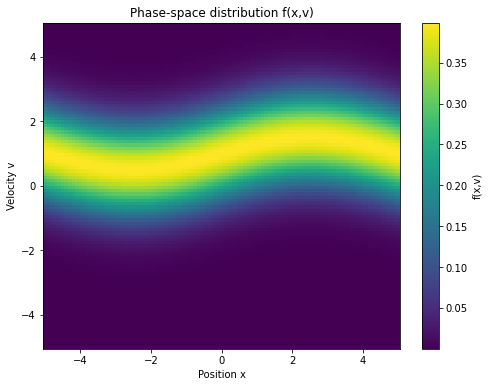

In [112]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Grids
Nx = 100  # number of spatial points
Nv = 100  # number of velocity points
x = np.linspace(-5, 5, Nx)
v = np.linspace(-5, 5, Nv)

X, V = np.meshgrid(x, v, indexing='ij')  # make phase space grid

# 2. Make a sample distribution function
# Example: Maxwellian with a bump moving to the right
rho = 1.0                      # density
u = 1.0 + 0.5 * np.sin(2 * np.pi * X / 10)  # local mean velocity (position dependent)
T = 1.0                        # constant temperature

f = rho / np.sqrt(2 * np.pi * T) * np.exp(-0.5 * ((V - u) ** 2) / T)

# 3. Plot
plt.figure(figsize=(8, 6))
plt.pcolormesh(x, v, f.T, shading='auto', cmap='viridis')
plt.colorbar(label='f(x,v)')
plt.xlabel('Position x')
plt.ylabel('Velocity v')
plt.title('Phase-space distribution f(x,v)')
plt.show()


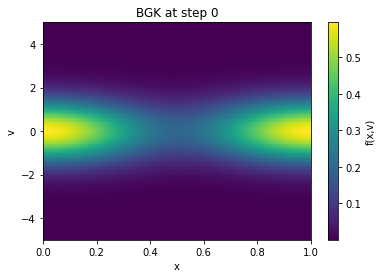

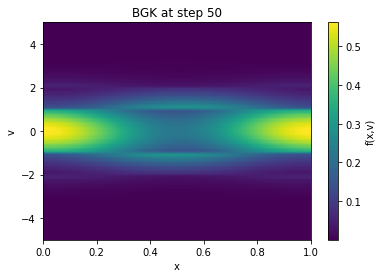

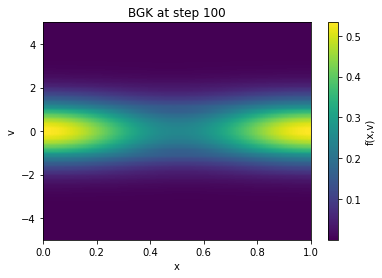

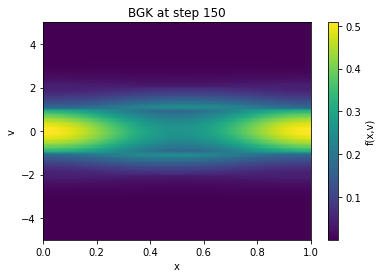

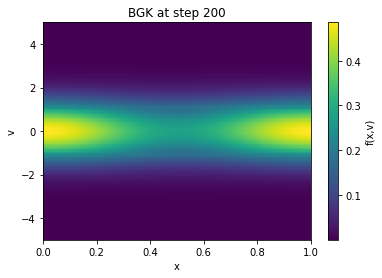

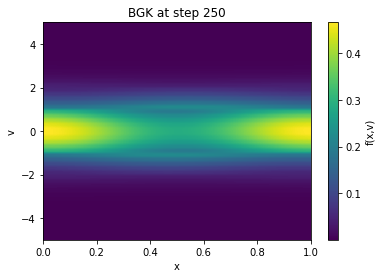

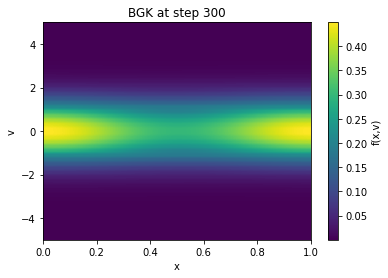

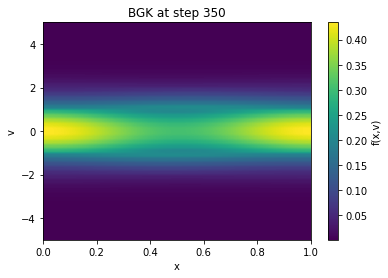

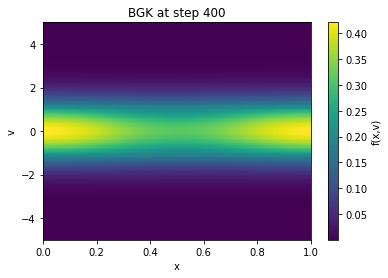

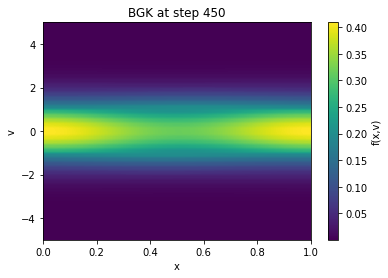

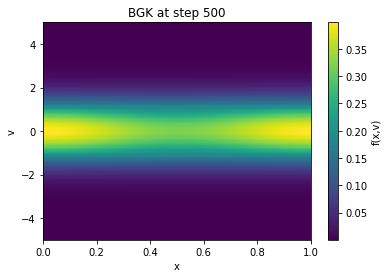

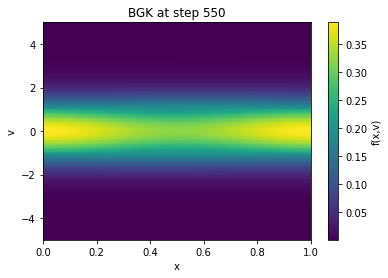

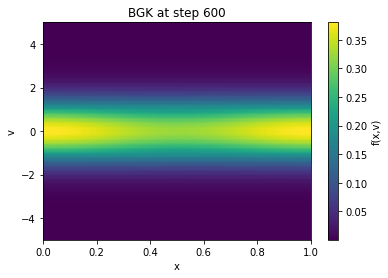

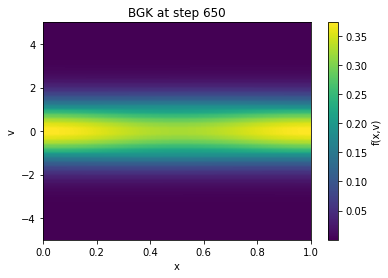

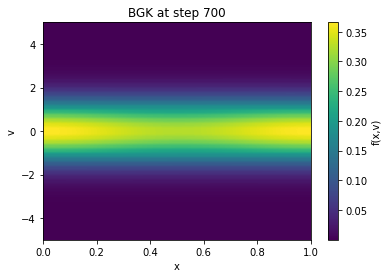

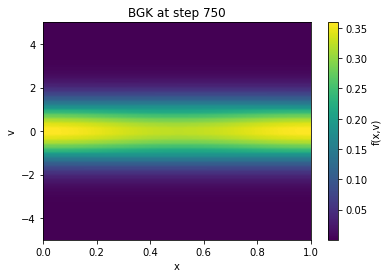

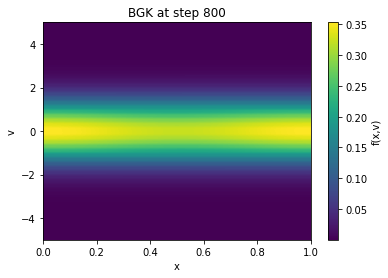

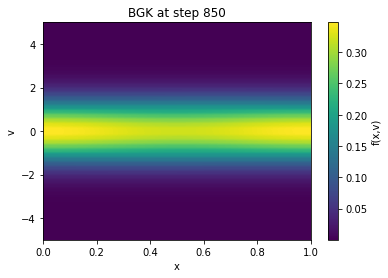

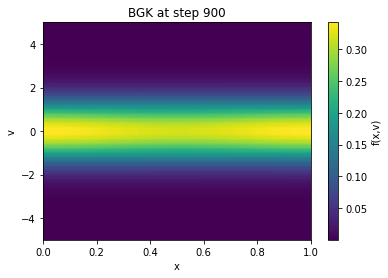

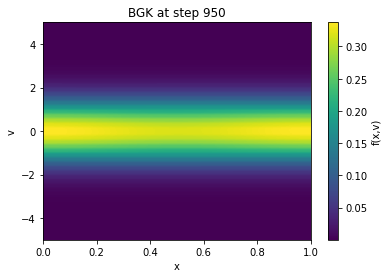

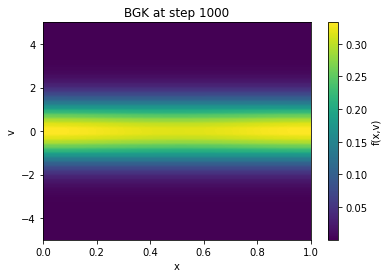

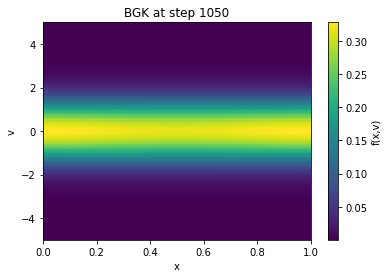

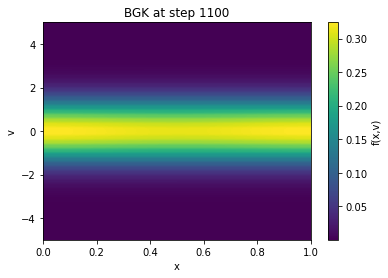

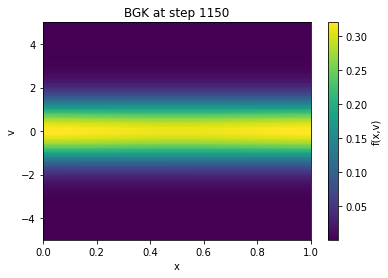

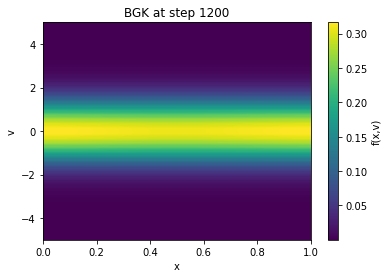

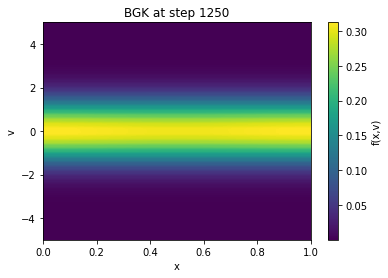

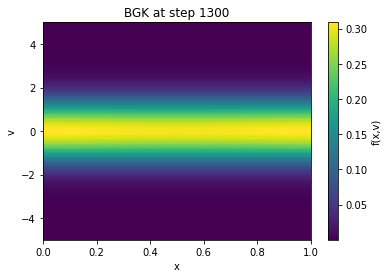

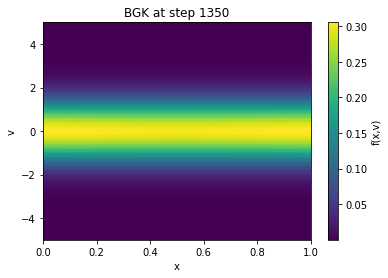

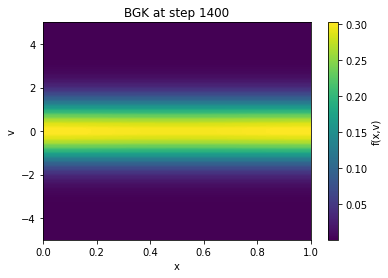

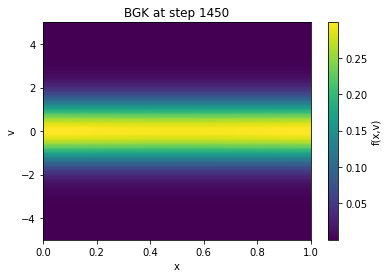

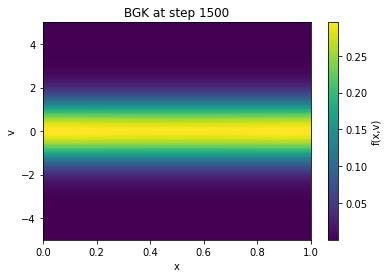

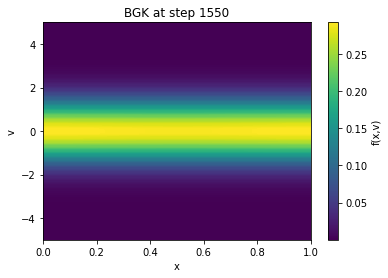

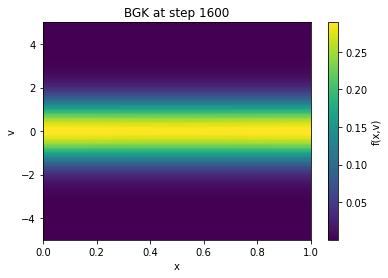

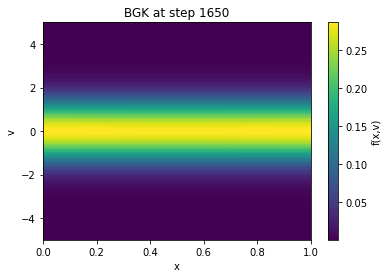

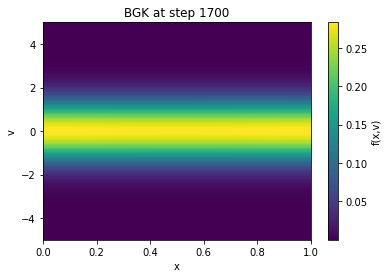

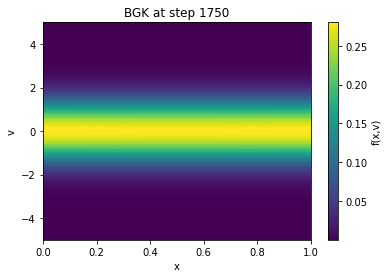

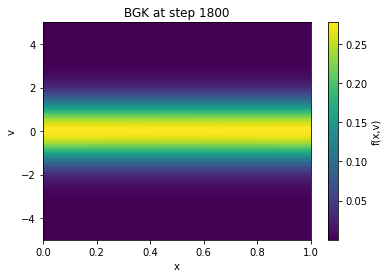

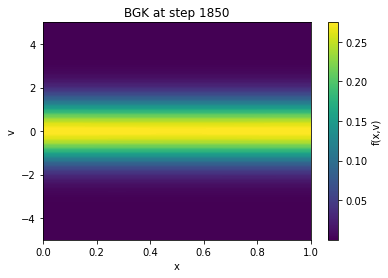

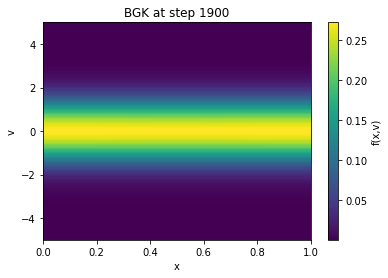

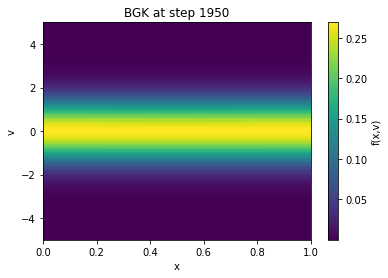

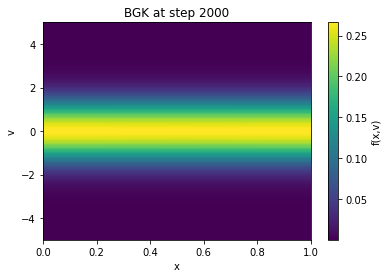

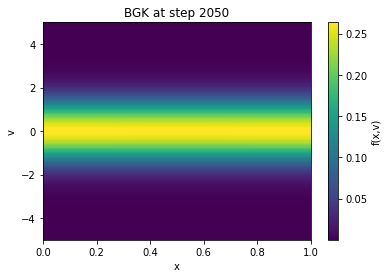

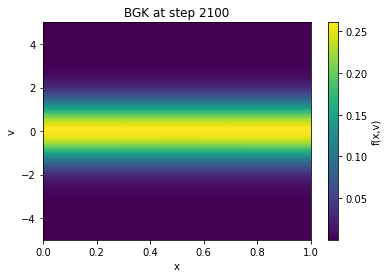

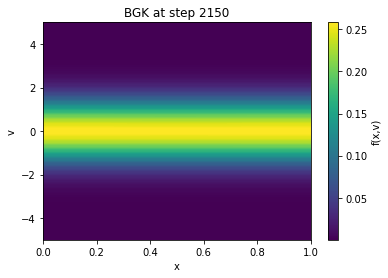

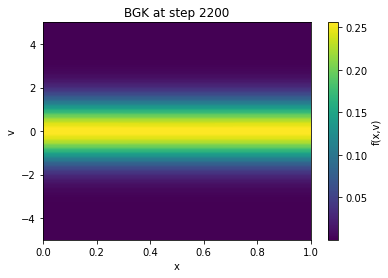

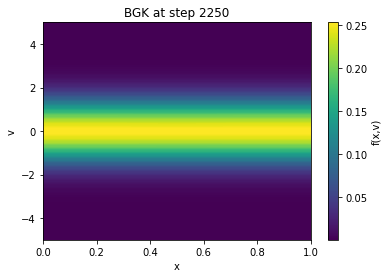

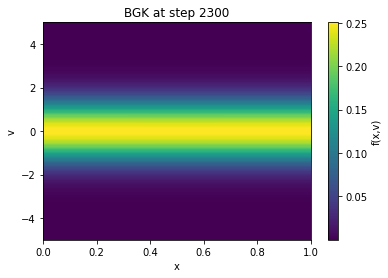

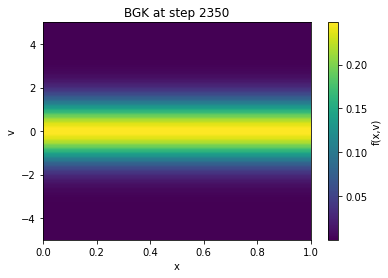

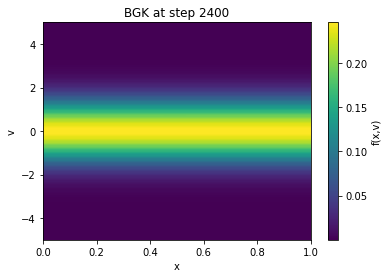

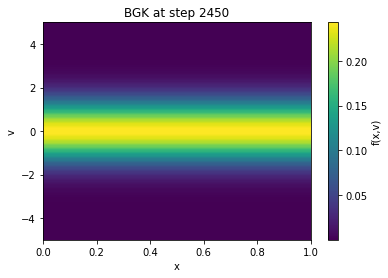

In [113]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# 1D BGK setup
# ---------------------------

Nx = 100  # spatial points
Nv = 50   # velocity grid
Lx = 1.0  # box length
Lv = 5.0  # max |v|

dx = Lx / Nx
dv = 2 * Lv / Nv

x = np.linspace(0, Lx, Nx, endpoint=False)
v = np.linspace(-Lv, Lv, Nv)

# time params
dt = 0.01
nu = 1.0  # collision frequency
steps = 1000

# ---------------------------
# Initial distribution f(x, v)
# ---------------------------

# For example: a bump in the middle
X, V = np.meshgrid(x, v, indexing='ij')
f = (1 + 0.5 * np.cos(2 * np.pi * X / Lx)) * (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * V**2)

# ---------------------------
# Helper: compute feq
# ---------------------------

def compute_feq(f):
    # integrate over v to get density and mean velocity at each x
    rho = np.sum(f, axis=1) * dv
    u = np.sum(f * V, axis=1) * dv / rho

    feq = np.zeros_like(f)
    for i in range(Nx):
        feq = rho[:, None] / np.sqrt(2*np.pi) * np.exp(-0.5 * (V - u[:, None])**2)
    return feq

# ---------------------------
# Main loop
# ---------------------------

for step in range(steps):
    # Free-streaming step (semi-Lagrangian)
    for j in range(Nv):
        shift = -v[j] * dt / dx
        f[:, j] = np.roll(f[:, j], int(shift))
    
    # Collision (BGK relaxation)
    feq = compute_feq(f)
    f += -nu * (f - feq) * dt

    if step % 50 == 0:
        plt.clf()
        plt.imshow(f.T, origin='lower', aspect='auto', extent=[0, Lx, -Lv, Lv])
        plt.colorbar(label='f(x,v)')
        plt.title(f"BGK at step {step}")
        plt.xlabel('x')
        plt.ylabel('v')
        plt.pause(0.1)

plt.show()


In [104]:
print(np.zeros_like(f))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(100,) (100,) (100, 100)


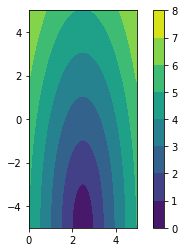

In [102]:
zs = np.sqrt(X**2 + V**2)
print(x.shape, v.shape, zs.shape)

h = plt.contourf(x,v, zs)

plt.axis('scaled')

plt.colorbar()

plt.show()